In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

## Data Collection

### df_products Data Description

`df_products`, contains descriptive information about individual products listed on Amazon. Each row represents a unique product identified by its `id`. The columns provide various attributes of these products, which can be used to understand their characteristics and popularity.

Here's a breakdown of each column:

*   **`id`**:
    *   **Data Type**: Integer
    *   **Description**: Unique identifier for each product. This ID is used to link products in the `df_copurchase` DataFrame, acting as the node identifier in the product network.
    *   **Example**: `1`, `2`, `3`, `4`, `5`, ...

*   **`title`**:
    *   **Data Type**: String (Text)
    *   **Description**: The name or title of the product. This provides a textual description of what the product is.
    *   **Example**: "Patterns of Preaching: A Sermon Sampler", "Candlemas: Feast of Flames", etc.

*   **`group`**:
    *   **Data Type**: String (Categorical)
    *   **Description**:  The category or group the product belongs to. This helps in understanding the product type (e.g., Book, Music, DVD, etc.).
    *   **Example**: "Book"

*   **`salesrank`**:
    *   **Data Type**: Float
    *   **Description**: Amazon sales rank of the product. A lower `salesrank` indicates higher sales and popularity. This is a common metric to gauge how well a product is selling on Amazon.
    *   **Example**: `396585.0`, `168596.0`, `1270652.0`, etc.

*   **`review_cnt`**:
    *   **Data Type**: Integer
    *   **Description**:  The number of customer reviews received for the product. A higher `review_cnt` can indicate greater product visibility, popularity, or customer engagement.
    *   **Example**: `2`, `12`, `1`, `1`, `0`, etc.

*   **`downloads`**:
    *   **Data Type**: Integer
    *   **Description**: The number of downloads associated with the product.  The exact meaning might depend on the dataset source. It could represent digital product downloads, or potentially another engagement metric.  In the context of "Book" products in the example, it might represent sample downloads, or perhaps a different type of engagement relevant to the dataset.
    *   **Example**: `2`, `12`, `1`, `1`, `0`, etc.

*   **`rating`**:
    *   **Data Type**: Float
    *   **Description**: The average customer rating of the product, typically on a scale of 0 to 5 (or similar). This reflects the overall customer satisfaction and perceived quality of the product.
    *   **Example**: `5.0`, `4.5`, `5.0`, `4.0`, `0.0`, etc.

In [15]:
df_products = pd.read_csv('products.csv')

df_products.head()

,id,title,group,salesrank,review_cnt,downloads,rating
0,1,Patterns of Preaching: A Sermon Sampler,Book,396585.0,2,2,5.0
1,2,Candlemas: Feast of Flames,Book,168596.0,12,12,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1270652.0,1,1,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,1,1,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,455160.0,0,0,0.0


## df_copurchase Data Description
`df_copurchase` represents the co-purchasing relationships between products. Each row signifies a directed relationship: if a customer purchased the product in the `Source` column, they were also likely to purchase the product in the `Target` column.

Here's a breakdown of each column:

*   **`Source`**:
    *   **Data Type**: Integer
    *   **Description**: Identifier of the product that was initially purchased (product ID-X as described in the project description). This column acts as the source node in the co-purchasing graph. It corresponds to the `id` column in the `df_products` DataFrame.
    *   **Example**: `1`, `1`, `1`, `1`, `2`, ...

*   **`Target`**:
    *   **Data Type**: Integer
    *   **Description**: Identifier of the product that was co-purchased with the 'Source' product (product ID-Y). This column acts as the target node in the co-purchasing graph. It also corresponds to the `id` column in the `df_products` DataFrame.
    *   **Example**: `2`, `4`, `5`, `15`, `11`, ...

In [16]:
df_copurchase = pd.read_csv('copurchase.csv')

df_copurchase.head()

,Source,Target
0,1,2
1,1,4
2,1,5
3,1,15
4,2,11


## Data Exploration

**Pertanyaan untuk df_products:**
1. Correlation Matrix antara salesrank, review count, download, rating

**Pertanyaan untuk df_copurchase:**
1. Jumlah row dalam df_copurchase
   * Berapa banyak total hubungan co-purchasing yang ada dalam dataset? Ini adalah jumlah baris dalam df_copurchase.
2. Top-5 produk yang paling banyak menjadi co-purchasing (source) (out-degree)
   * Produk mana yang paling sering menjadi "Source" dalam df_copurchase? Ini mengindikasikan produk mana yang pembeliannya paling sering diikuti dengan pembelian produk lain. Hitung out-degree setiap node (produk).
   * Visualisasikan top produk dengan out-degree tertinggi (misalnya dengan bar chart).
3. Top-5 produk yang paling banyak di co-purchase (target) (in-degree)
   * Produk mana yang paling sering menjadi "Target" dalam df_copurchase? Ini mengindikasikan produk mana yang paling sering dibeli bersamaan dengan produk lain. Hitung in-degree setiap node (produk).
   * Visualisasikan top produk dengan in-degree tertinggi (misalnya dengan bar chart).
4. Distribusi In-degree (di-copurchase) dan Out-degree (co-purchasing)
   * Contohnya, untuk in-degree, bagaimana distribusinya (node dengan in-degree 0 ada berapa, 1 ada berapa, etc.)
   * Visualisasikan
5. Produk yang tidak pernah masuk ke df_copurchase (cek source, target, atau keduanya)
   * Identifikasi produk-produk yang tidak muncul sebagai "Source" atau "Target" dalam df_copurchase. Produk-produk ini tidak memiliki hubungan co-purchasing dalam dataset.
   * Apakah ada karakteristik khusus dari produk-produk ini (misalnya group, salesrank, dll.)?

**Pertanyaan untuk keduanya:**
1. Hitung in-degree dan out-degree untuk masing-masing produk, kemudian gabungkan ke df_products dan hitung korelasi antara
   salesrank, review count, download, rating, in-degree, out-degree
   * Gunakan scatter plot atau boxplot untuk visualisasi dan hitung korelasi jika relevan.
2. Hitung statistics co-purchsing (in-degree, out-degree) untuk masing-masing group.
3. Hitung konektivitas untuk masing-masing group (e.g., jumlah koneksi out-degree dan in-degree dalam group dan keluar group)
4. Hitung hubungan antar group (e.g., untuk group A, hitung out-degree ke group B, C, D, dst dan
   in-degree dari group B, C, D, dst. ke group A) 

---

#### Graph Visualization

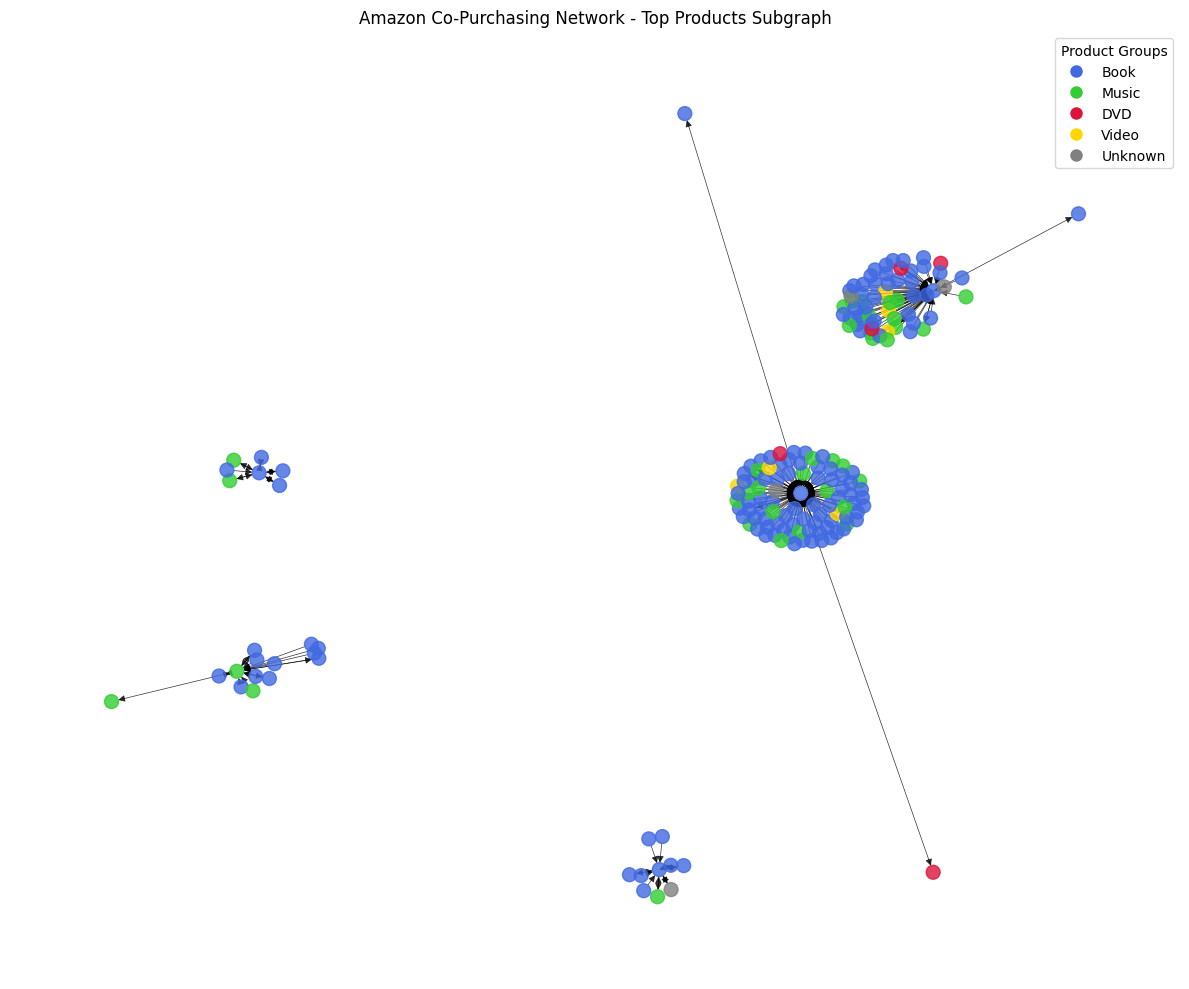

In [40]:
# Get products with highest in-degree (most popular targets)
top_products = df_copurchase['Target'].value_counts().head(30).index.tolist()

# Create subgraph with just these products and their immediate neighbors
subgraph_edges = df_copurchase[
    (df_copurchase['Source'].isin(top_products[:5])) | 
    (df_copurchase['Target'].isin(top_products[:5]))
].head(200)

# Create graph from this subset
G_sub = nx.from_pandas_edgelist(subgraph_edges, 'Source', 'Target', create_using=nx.DiGraph())

# Get group colors
node_groups = {node: df_products[df_products['id'] == node]['group'].values[0] 
               if node in df_products['id'].values else 'Unknown'
               for node in G_sub.nodes()}

# Map groups to colors
group_to_color = {'Book': 'royalblue', 'Music': 'limegreen', 
                  'DVD': 'crimson', 'Video': 'gold', 'Unknown': 'gray'}
node_colors = [group_to_color.get(node_groups.get(node, 'Unknown'), 'gray') for node in G_sub.nodes()]

# Plot
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw_networkx(G_sub, pos, 
                 node_color=node_colors,
                 node_size=100, 
                 with_labels=False,
                 alpha=0.8,
                 width=0.5,
                 arrowsize=10)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, 
                             markersize=10, label=group) 
                  for group, color in group_to_color.items()]
plt.legend(handles=legend_elements, title="Product Groups")

plt.title("Amazon Co-Purchasing Network - Top Products Subgraph")
plt.axis('off')
plt.tight_layout()
plt.show()

#### Correlation Matrix antara salesrank, review count, download, rating

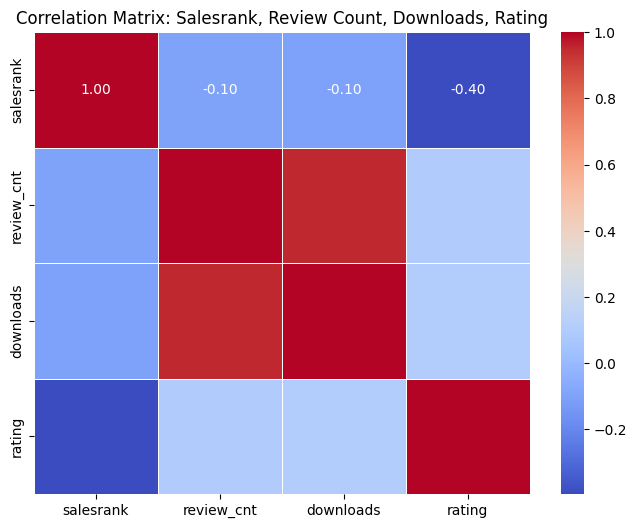

In [17]:
# Memilih hanya kolom yang relevan untuk analisis korelasi
correlation_matrix = df_products[['salesrank', 'review_cnt', 'downloads', 'rating']].corr()

# Visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Salesrank, Review Count, Downloads, Rating")
plt.show()

**Penjelasan**

1. **Salesrank memiliki korelasi negatif dengan review count, downloads, dan rating**, yang berarti produk dengan peringkat penjualan lebih rendah (lebih populer) cenderung memiliki lebih banyak ulasan, unduhan, dan rating yang lebih tinggi
2. **Review count dan downloads memiliki korelasi positif yang kuat**, menunjukkan bahwa produk yang sering diunduh juga sering mendapatkan banyak ulasan
3. **Rating memiliki korelasi lemah dengan metrik lainnya**, menunjukkan bahwa jumlah ulasan atau unduhan tidak selalu berbanding lurus dengan rating yang diberikan pengguna.

#### Jumlah row dalam df_copurchase

In [18]:
len(df_copurchase)

1234870

#### Top-5 produk yang paling banyak menjadi co-purchasing (source) (out-degree)

In [19]:
# Menghitung jumlah kemunculan setiap produk sebagai 'Source' (out-degree)
top_out_degree = df_copurchase['Source'].value_counts()
top_out_degree

Source
131454    5
166501    5
166487    5
166488    5
166489    5
         ..
44578     1
250624    1
82937     1
208301    1
184560    1
Name: count, Length: 257569, dtype: int64

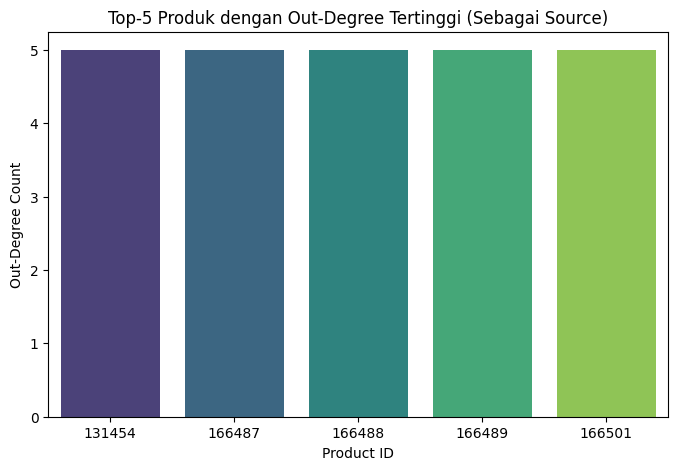

Source
131454    5
166501    5
166487    5
166488    5
166489    5
166490    5
166491    5
166492    5
166493    5
166494    5
Name: count, dtype: int64

In [20]:
# Menghitung jumlah kemunculan setiap produk sebagai 'Source' (out-degree)
top_out_degree = df_copurchase['Source'].value_counts().head(5)

# Visualisasi dengan bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=top_out_degree.index, y=top_out_degree.values, palette="viridis")
plt.xlabel("Product ID")
plt.ylabel("Out-Degree Count")
plt.title("Top-5 Produk dengan Out-Degree Tertinggi (Sebagai Source)")
plt.show()

top_out_degree = df_copurchase['Source'].value_counts().head(10)
top_out_degree

**Penjelasan**

Grafik di atas menunjukkan Top-5 produk dengan out-degree tertinggi, yaitu **produk yang paling sering muncul sebagai Source dalam hubungan co-purchasing**

Kelima produk teratas memiliki jumlah koneksi (out-degree) sebanyak 5 kali masing-masing, dengan Product IDs :

131454 <br>
166501 <br>
166487 <br>
166488 <br>
166489

#### Top-5 produk yang paling banyak di co-purchase (target) (in-degree)

#### Distribusi In-degree (di-copurchase) dan Out-degree (co-purchasing)

#### Produk yang tidak pernah masuk ke df_copurchase (cek source, target, atau keduanya)

In [21]:
id_set = set(df_products['id'])
copurchase_source_set = set(df_copurchase['Source'])
copurchase_target_set = set(df_copurchase['Target'])
copurchase_target_and_source_set = copurchase_source_set.union(copurchase_target_set)

len(id_set), len(copurchase_source_set), len(copurchase_target_set), len(copurchase_target_and_source_set)

(259167, 257569, 262108, 262110)

Ternyata, ada banyak produk yang masuk ke co-purchase dataframe tapi tidak ada datanya di products dataframe.

In [22]:
copurchase_target_and_source_set.difference(id_set)

{106502,
 229391,
 204817,
 147475,
 188436,
 32791,
 163866,
 172058,
 188446,
 221214,
 73762,
 98339,
 8229,
 180262,
 221221,
 221224,
 188458,
 253998,
 155695,
 204848,
 65590,
 65592,
 204856,
 172090,
 204857,
 204858,
 204859,
 32830,
 147519,
 155710,
 172095,
 204860,
 204862,
 204864,
 114757,
 114763,
 98380,
 16461,
 114765,
 16463,
 16464,
 196684,
 16466,
 16468,
 16469,
 16471,
 172119,
 204890,
 180317,
 221284,
 254056,
 122985,
 147563,
 73836,
 106605,
 147566,
 90230,
 16507,
 16510,
 172160,
 254080,
 8322,
 172163,
 254089,
 73867,
 188560,
 180373,
 196760,
 49305,
 147609,
 196761,
 163997,
 237726,
 188576,
 57506,
 24739,
 155811,
 24741,
 221353,
 204970,
 82095,
 82096,
 65714,
 237747,
 139450,
 98494,
 147654,
 147659,
 147660,
 98509,
 237778,
 245976,
 106716,
 188636,
 90336,
 24801,
 57570,
 172258,
 82148,
 205028,
 229605,
 155883,
 213228,
 16622,
 254191,
 254196,
 33013,
 214975,
 237818,
 73986,
 49422,
 205071,
 16659,
 172307,
 114968,
 13136

In [23]:
ids_not_in_copurchase = id_set - copurchase_target_and_source_set
ids_not_in_copurchase = list(ids_not_in_copurchase)
ids_not_in_source_set = id_set - copurchase_source_set
ids_not_in_source_set = list(ids_not_in_source_set)
ids_not_in_target_set = id_set - copurchase_target_set
ids_not_in_target_set = list(ids_not_in_target_set)

print(f"Number of products not in copurchase: {df_products['id'].isin(ids_not_in_copurchase).sum()}")
print(f"Number of products not in source set: {df_products['id'].isin(ids_not_in_source_set).sum()}")
print(f"Number of products not in target set: {df_products['id'].isin(ids_not_in_target_set).sum()}")

Number of products not in copurchase: 0
Number of products not in source set: 4498
Number of products not in target set: 2


In [24]:
df_product_not_in_source = df_products[df_products['id'].isin(ids_not_in_source_set)]

df_product_not_in_target = df_products[df_products['id'].isin(ids_not_in_target_set)]

,id,salesrank,review_cnt,downloads,rating
count,4498.000000,4.498000e+03,4498.000000,4498.000000,4498.000000
mean,125751.353268,5.008037e+05,13.276345,13.182748,3.138951
std,81875.753261,5.857637e+05,51.565032,51.410507,2.030436
min,9.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,57594.250000,9.625275e+04,0.000000,0.000000,0.000000
50%,106080.500000,3.029205e+05,2.000000,2.000000,4.000000
75%,210240.250000,6.690218e+05,8.000000,8.000000,5.000000
max,262096.000000,3.523759e+06,1447.000000,1435.000000,5.000000


c:\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


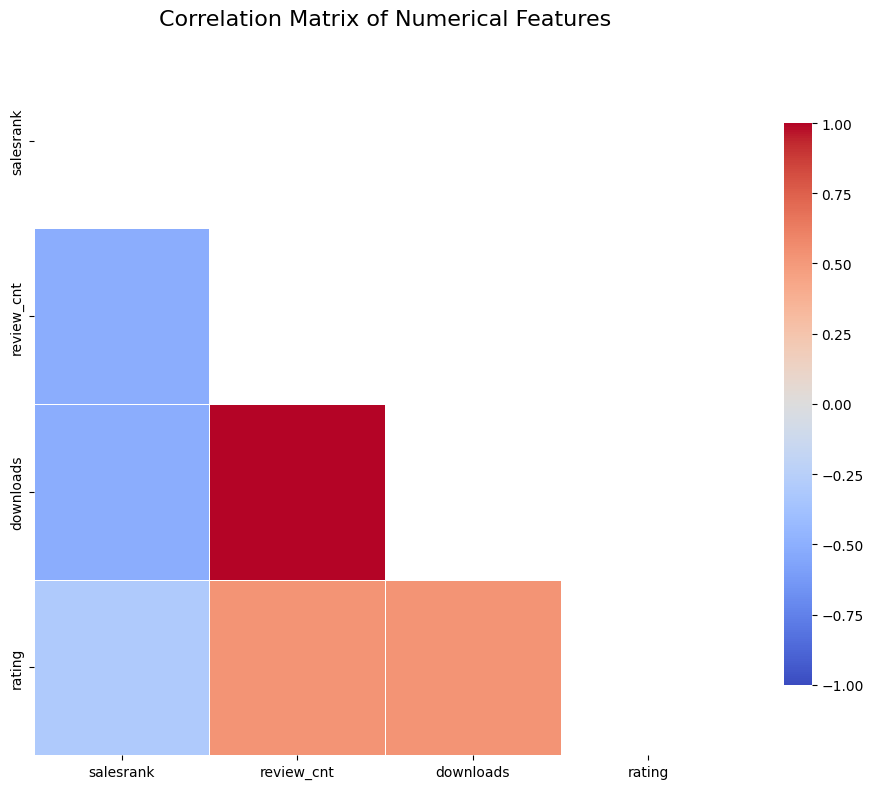

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

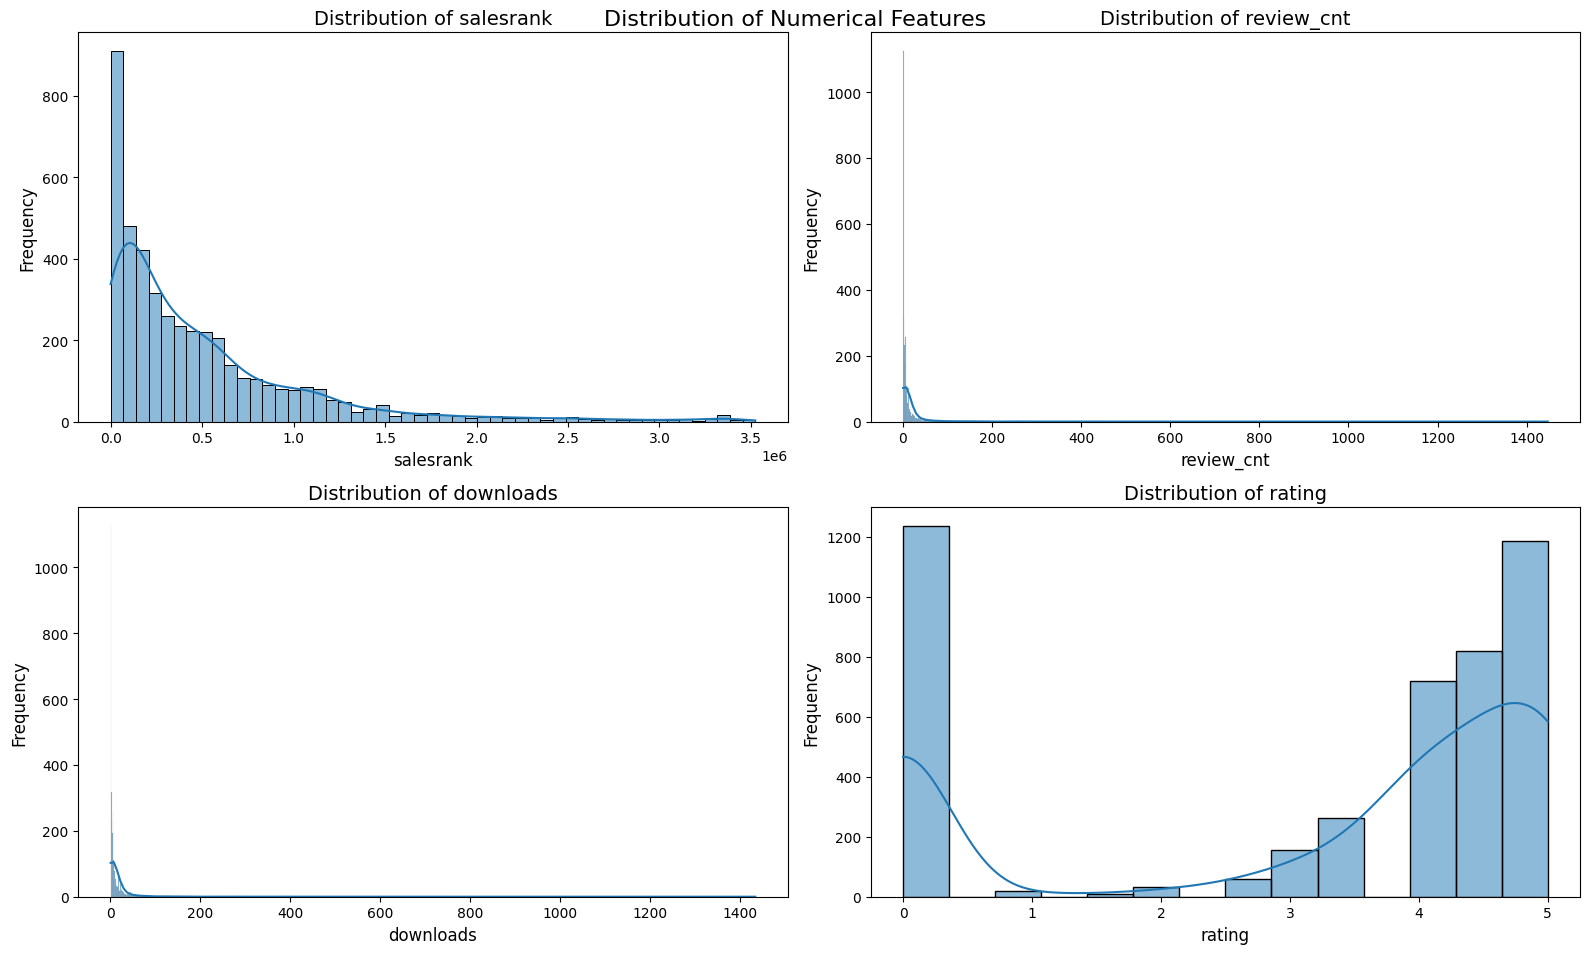

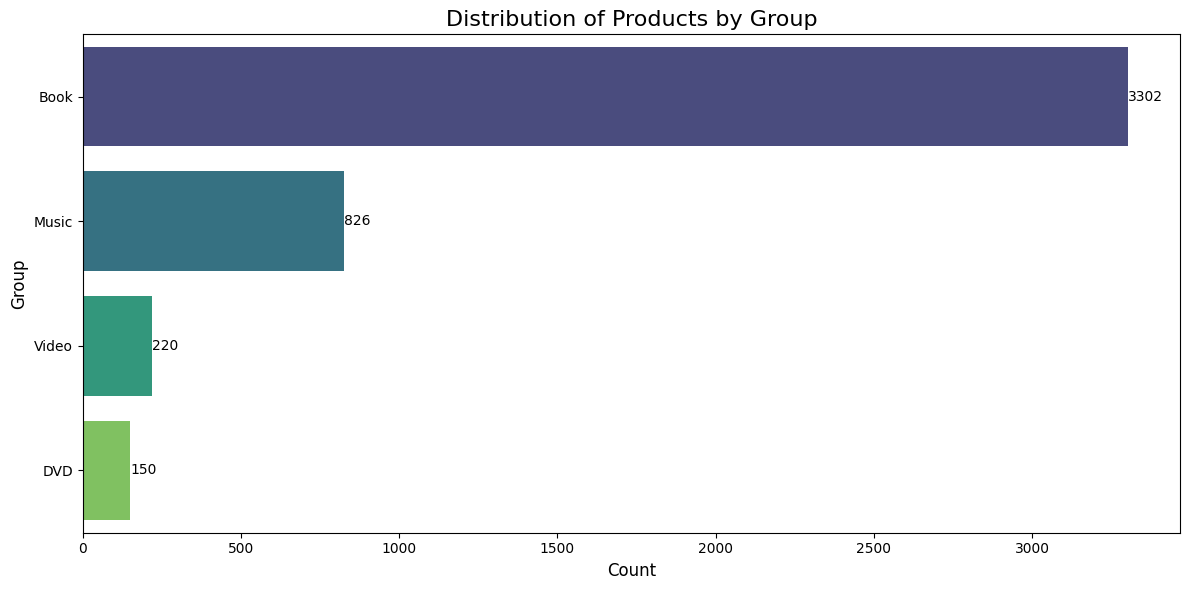

In [25]:
num_cols = ['salesrank', 'review_cnt', 'downloads', 'rating']

display(df_product_not_in_source.describe())

plt.figure(figsize=(10, 8))
corr_matrix = df_product_not_in_source[num_cols].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
           mask=mask,
           annot=True, 
           cmap='coolwarm', 
           vmin=-1, 
           vmax=1, 
           center=0,
           square=True,
           linewidths=.5,
           cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 3. Distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=0.95)
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # Filter out non-positive values for log scale columns (except rating)
    if col != 'rating':
        # Only plot positive values for log scale
        valid_data = df_product_not_in_source[df_product_not_in_source[col] > 0][col]
        sns.histplot(valid_data, kde=True, ax=axes[i])
        # axes[i].set_yscale('log') 
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_ylabel('Frequency', fontsize=12)
    else:
        # For rating, keep linear scale
        sns.histplot(df_product_not_in_source[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_ylabel('Frequency', fontsize=12)
    
    axes[i].set_xlabel(col, fontsize=12)
    

plt.tight_layout()
plt.show()

# 4. Group value counts visualization
plt.figure(figsize=(12, 6))
group_counts = df_product_not_in_source['group'].value_counts()

ax = sns.barplot(x=group_counts.values, y=group_counts.index, palette='viridis')

for i, v in enumerate(group_counts.values):
    ax.text(v + 0.1, i, str(v), va='center')
    
plt.title('Distribution of Products by Group', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Group', fontsize=12)
plt.tight_layout()
plt.show()


#### Jumlah Produk yang Tidak Berpartisipasi
- **0 produk** yang tidak muncul sama sekali dalam co-purchase (semua produk muncul minimal sebagai source atau target)
- **4.498 produk** tidak pernah menjadi "Source" dalam hubungan co-purchase
- **Hanya 2 produk** yang tidak pernah menjadi "Target" dalam hubungan co-purchase

#### Karakteristik Produk yang Tidak Pernah Menjadi Source
1. **Distribusi Group**: 
   - Didominasi oleh produk kategori "Book"
   - Hal ini menunjukkan bahwa buku-buku tertentu jarang menjadi titik awal rekomendasi co-purchase

2. **Peringkat Penjualan (Salesrank)**:
   - Distribusi salesrank sangat skewed dengan beberapa produk memiliki peringkat penjualan yang sangat tinggi
   - Produk-produk ini cenderung memiliki salesrank yang lebih buruk (angka lebih tinggi) dibandingkan rata-rata produk
   - Ini mengindikasikan produk-produk yang tidak populer jarang menjadi pemicu pembelian produk lain

3. **Jumlah Review dan Downloads**:
   - Sebagian besar memiliki jumlah review dan downloads yang sangat rendah
   - Terdapat korelasi positif antara review_cnt dan downloads
   - Produk dengan engagement rendah (review dan downloads sedikit) cenderung tidak mendorong co-purchase

4. **Rating**:
   - Distribusi rating menunjukkan polarisasi, banyak produk dengan rating sangat rendah atau sangat tinggi
   - Banyak produk tanpa rating (rating = 0)

Analisis ini menunjukkan bahwa popularitas dan engagement produk sangat mempengaruhi kemampuannya untuk menjadi trigger dalam pembelian produk lain.

#### Hitung in-degree dan out-degree untuk masing-masing produk, kemudian gabungkan ke df_products dan hitung korelasi antara salesrank, review count, download, rating, in-degree, out-degree

In [27]:
out_degree_series = df_copurchase['Source'].value_counts()
out_degree_series.index.name = 'id'

out_degree_series.head()

id
131454    5
166501    5
166487    5
166488    5
166489    5
Name: count, dtype: int64

In [28]:
in_degree_series = df_copurchase['Target'].value_counts()
in_degree_series.index.name = 'id'

in_degree_series.head()

id
14949    420
4429     404
33       361
10519    334
12771    330
Name: count, dtype: int64

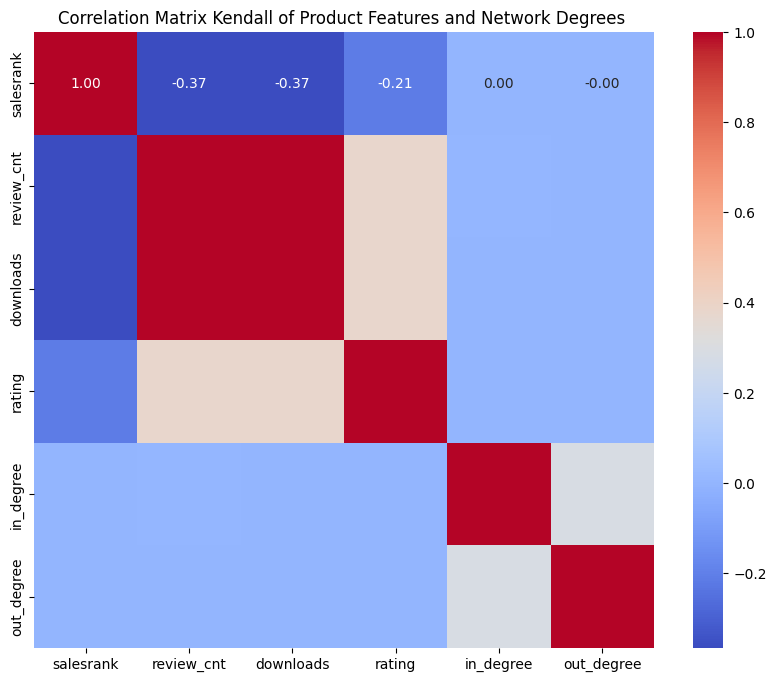

In [29]:
df_products['in_degree'] = df_products['id'].map(in_degree_series).fillna(0).astype(int)


df_products['out_degree'] = df_products['id'].map(out_degree_series).fillna(0).astype(int)

df_products_kendall = df_products.copy()
correlation_matrix_kendall = df_products_kendall[['salesrank', 'review_cnt', 'downloads', 'rating', 'in_degree', 'out_degree']].corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Kendall of Product Features and Network Degrees ')
plt.show()

Dari hasil yang didapatkan dengan menggunakan metode Kendall terlihat bahwa ada:
- Hubungan yang sangat kuat (bernilai +1) antara review_cnt downloads. 
- Salesrank berkorelasi moderat (bernilai -0.37) dengan review_cnt, downloads dan berkorelasi lemah (bernilai -0.21) dengan rating ini menandakan bahwa salesrank memiliki jumlah review, downloads yang banyak tetapi mempunyai rating yang menegah.
- Rating berkorelasi moderat (bernilai 0.38) dengan review_cnt, downloads menandakan bahwa rating memiliki jumlah review, downloads yang banyak
- Tidak ada hubungan antar in_degree dan out_degree dengan salesrank, jumlah review, atau rating ini menandakan bahwa kedua atribut tersebut tidak terlalu berkaitan langsung dengan salesrank, jumlah review, atau rating pada produk.

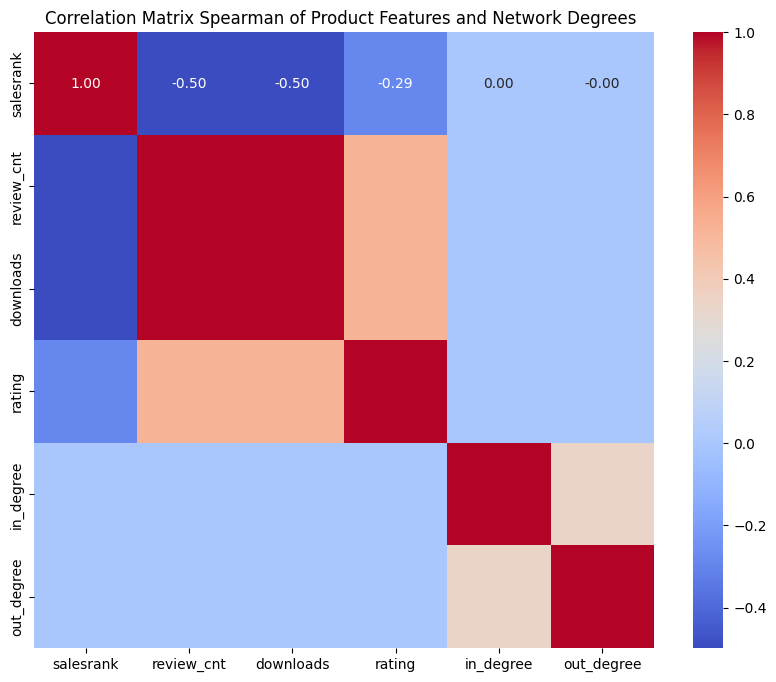

In [30]:
df_products_spearman = df_products.copy()

correlation_matrix_spearman= df_products_spearman[['salesrank', 'review_cnt', 'downloads', 'rating', 'in_degree', 'out_degree']].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Spearman of Product Features and Network Degrees ')
plt.show()

Dari hasil yang didapatkan dengan menggunakan metode Spearman terlihat bahwa ada:
- Masih mempertahankan hubungan yang sangat kuat (bernilai +1) antara review_cnt downloads. 
- Korelasi salesrank meningkat dibandingkan dengan metode Kendall dan mendekati kategori kuat (bernilai -0.50) dengan review_cnt, downloads dan berkorelasi lemah (bernilai -0.29) dengan rating ini menandakan bahwa salesrank memiliki jumlah review, downloads yang banyak tetapi mempunyai rating yang menegah.
- Korelasi rating meningkat dibandingkan dengan metode Kendall dan berkorelasi kuat (bernilai 0.52) dengan review_cnt, downloads menandakan bahwa rating memiliki jumlah review, downloads yang banyak.
- Tetap Tidak ada hubungan antar in_degree dan out_degree dengan salesrank, jumlah review, atau rating ini menandakan bahwa kedua atribut tersebut tidak terlalu berkaitan langsung dengan salesrank, jumlah review, atau rating pada produk.

#### Hitung statistics co-purchsing (in-degree, out-degree) untuk masing-masing group (serta distribusinnya).

In [31]:
df_products_no_id = df_products.drop(columns=['id'])
df_products_no_id.describe()

,salesrank,review_cnt,downloads,rating,in_degree,out_degree
count,2.591670e+05,259167.000000,259167.000000,259167.000000,259167.000000,259167.000000
mean,4.955061e+05,14.000895,13.750589,3.158454,4.711290,4.711287
std,5.750585e+05,72.878967,69.013924,2.019447,5.708299,0.951783
min,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.191100e+04,0.000000,0.000000,0.000000,2.000000,5.000000
50%,3.031550e+05,2.000000,2.000000,4.000000,3.000000,5.000000
75%,6.778710e+05,8.000000,7.000000,5.000000,6.000000,5.000000
max,3.793303e+06,5545.000000,4995.000000,5.000000,420.000000,5.000000


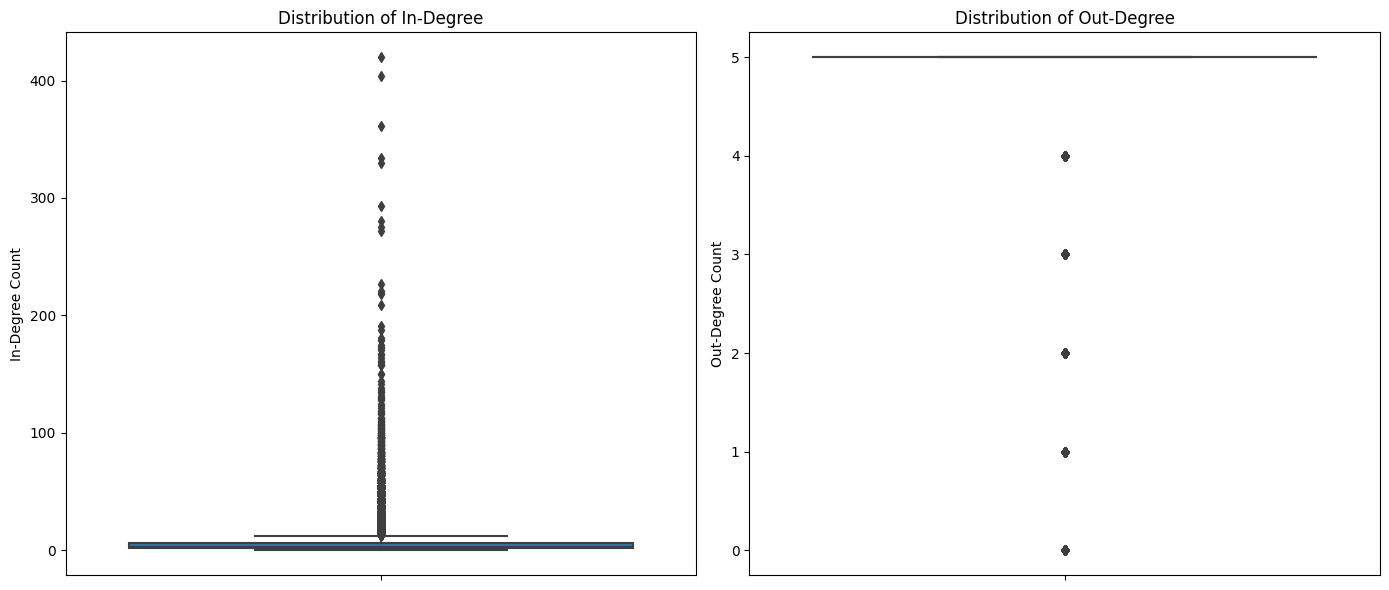

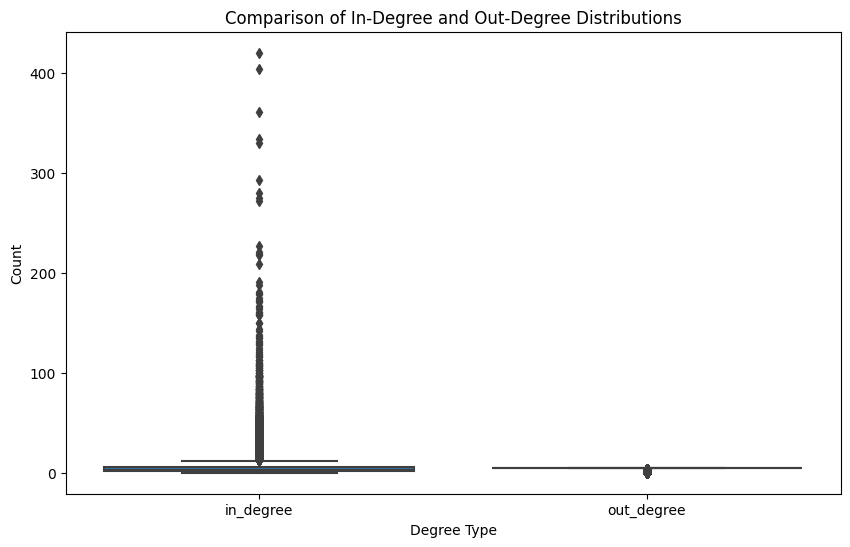

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Individual boxplots with better visibility
sns.boxplot(y='in_degree', data=df_products_no_id, ax=axes[0])
axes[0].set_title('Distribution of In-Degree')
axes[0].set_ylabel('In-Degree Count')

sns.boxplot(y='out_degree', data=df_products_no_id, ax=axes[1])
axes[1].set_title('Distribution of Out-Degree')
axes[1].set_ylabel('Out-Degree Count')

plt.tight_layout()
plt.show()

# Create a long-format DataFrame for side-by-side comparison
df_long = pd.melt(df_products_no_id[['in_degree', 'out_degree']], 
                  var_name='Degree Type', 
                  value_name='Count')

# Side-by-side boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Degree Type', y='Count', data=df_long)
plt.title('Comparison of In-Degree and Out-Degree Distributions')
plt.ylabel('Count')
plt.show()

Dapat dilihat, distribusi out degree terfokuskan antara 1 - 5 dan lebih padat di sekitar 5. Sementara itu, in degree memiliki banyak sekali outliers, dan distribusinya jauh lebih skewed dibandingkan out degree.

Kebanyakan node memiliki in degree sedikit namun, ada beberapa node yang memiliki in degree sangat tinggi. Hal ini menunjukkan bahwa ada beberapa produk yang sangat populer dan sering dibeli bersamaan dengan produk lain, sementara sebagian besar produk lainnya tidak memiliki hubungan co-purchasing yang signifikan.

#### Hitung konektivitas untuk masing-masing group (e.g., jumlah koneksi out-degree dan in-degree dalam group dan keluar group)

#### Hitung hubungan antar group (e.g., untuk group A, hitung out-degree ke group B, C, D, dst dan in-degree dari group B, C, D, dst. ke group A) 